Benchmarking - Concepts
======================
**General Information about document**

This is an interactive work-sheet regarding "Benchmarking-Concepts" for the course "Introduction to robot path planning" (Author: Björn Hein). It is based on the slides PRM-Basics.pdf, so please **read the information in theses slides first** (s. "Vorlesungsarbeitsbereich").

Version | Author
------------ | -------------
0.1 | Björn Hein

License is based on Creative Commons: Attribution-NonCommercial 4.0 International (CC BY-NC 4.0) (pls. check: http://creativecommons.org/licenses/by-nc/4.0/)

This work-sheet should include all necessary incredience to implement different PRM algorithm for path planning applications in Python.


Important links are:

    General Info: http://www.python.org
    Python tutorial http://www.python.org/doc/tut/
    NetworkX http://networkx.github.io/
    NumPy and SciPy Guide http://docs.scipy.org/
    Matplotlib gallery http://matplotlib.sourceforge.net/gallery.html

Remember that:

    you have to press ctrl-return or shift-return, to execute the code in the code sections, only then the variables are "generated" and can be used
    you can execute the whole notebook by Cell->runAll


## Idea

Basic idea is to collect data for different planer runs on different benchmarks. Therefore first is to define a **Benchmark** (s. IPBenchmark.py):

```python

class Benchmark(object):
        
    def __init__(self, name, collisionChecker, startList, goalList, description, level ):
        """Benchmark is used to define tests cases
        
        :name: Name of benchmark
        :environment: collision checker
        :startList: list of possible start configurations
        :goalList: list of possible goal configurations
        :description: textual description of the benchmark
        :level (int): 1 -"easy",2 - "normal",3 - "hard", 4 - "insane" (Assumed level)
        """
        self.name = name
        self.collisionChecker = collisionChecker # environment (collision checker) 
        self.startList = startList # in limits, collision-free?
        self.goalList = goalList # in limits, collision-free?
        self.description = description
        self.level = level # in [1,2,3,4]
```


## Collecting Benchmarks in a list

Based on this description it is possible to define a list of benschmarks, e.g. (s. ITestSuite.py):


```python
benchList = list()

# -----------------------------------------
trapField = dict()
trapField["obs1"] =   LineString([(6, 18), (6, 8), (16, 8), (16,18)]).buffer(1.0)
description = "Following the direct connection from goal to start would lead the algorithm into a trap."
benchList.append(Benchmark("Trap", CollisionChecker(trapField), [[10,15]], [[10,1]], description, 2))

# -----------------------------------------
bottleNeckField = dict()
bottleNeckField["obs1"] = LineString([(0, 13), (11, 13)]).buffer(.5)
bottleNeckField["obs2"] = LineString([(13, 13), (23,13)]).buffer(.5)
description = "Planer has to find a narrow passage."
benchList.append(Benchmark("Bottleneck", CollisionChecker(bottleNeckField), [[4,15]], [[18,1]], description, 2))

# -----------------------------------------
fatBottleNeckField = dict()
fatBottleNeckField["obs1"] = Polygon([(0, 8), (11, 8),(11, 15), (0, 15)]).buffer(.5)
fatBottleNeckField["obs2"] = Polygon([(13, 8), (24, 8),(24, 15), (13, 15)]).buffer(.5)
description = "Planer has to find a narrow passage with a significant extend."
benchList.append(Benchmark("Fat bottleneck", CollisionChecker(fatBottleNeckField), [[4,21]], [[18,1]], description, 2))
```


In [61]:
from IPEnvironment import CollisionChecker
from IPBenchmark import Benchmark
import matplotlib.pylab as plt
from shapely.geometry import Point, Polygon, LineString
from shapely import plotting

In [62]:
benchList = list()

trapField = dict()
trapField["obs1"] =   LineString([(6, 18), (6, 8), (16, 8), (16,18)]).buffer(1.0)
description = "Following the direct connection from goal to start would lead the algorithm into a trap."
benchList.append(Benchmark("Trap", CollisionChecker(trapField), [[10,15]], [[10,1]], description, 2))

bottleNeckField = dict()
bottleNeckField["obs1"] = LineString([(0, 13), (11, 13)]).buffer(.5)
bottleNeckField["obs2"] = LineString([(13, 13), (23,13)]).buffer(.5)
description = "Planer has to find a narrow passage."
benchList.append(Benchmark("Bottleneck", CollisionChecker(bottleNeckField), [[4,15]], [[18,1]], description, 2))


fatBottleNeckField = dict()
fatBottleNeckField["obs1"] = Polygon([(0, 8), (11, 8),(11, 15), (0, 15)]).buffer(.5)
fatBottleNeckField["obs2"] = Polygon([(13, 8), (24, 8),(24, 15), (13, 15)]).buffer(.5)
description = "Planer has to find a narrow passage with a significant extend."
benchList.append(Benchmark("Fat bottleneck", CollisionChecker(fatBottleNeckField), [[4,21]], [[18,1]], description, 2))


myField = dict()
myField["L"] = Polygon([(10, 16), (10, 11), (13, 11), (13,12), (11,12), (11,16)])
myField["T"] = Polygon([(14,16), (14, 15), (15, 15),(15,11), (16,11), (16,15), (17, 15), (17, 16)])
myField["C"] = Polygon([(19, 16), (19, 11), (22, 11), (22, 12), (20, 12), (20, 15), (22, 15), (22, 16)])

myField["Antenna_L"] = Polygon([(3, 12), (1, 16), (2, 16), (4, 12)])
myField["Antenna_Head_L"] = Point(1.5, 16).buffer(1)

myField["Antenna_R"] = Polygon([(7, 12), (9, 16), (8, 16), (6, 12)])
myField["Antenna_Head_R"] = Point(8.5, 16).buffer(1)

myField["Rob_Head"] = Polygon([(2, 13), (2, 8), (8, 8), (8, 13)])
description = "Planer has to find a passage past a robot head and the print of the LTC."
benchList.append(Benchmark("MyField", CollisionChecker(myField), [[4,21]], [[18,1]], description, 2))

## Visualizing different Benchmarks

Based on this list it is possible to iteratively call different configurations of a planner with different benchmarks

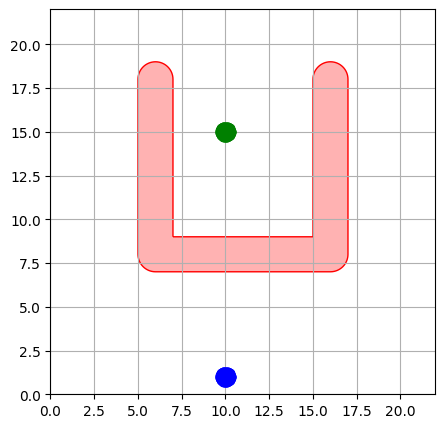

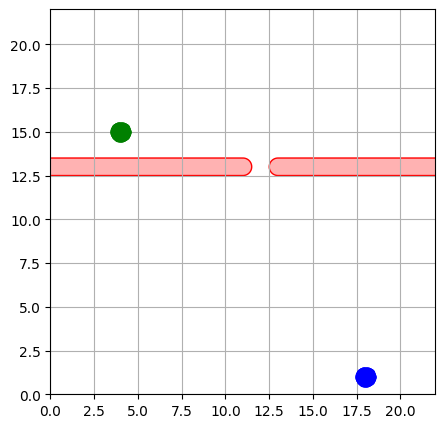

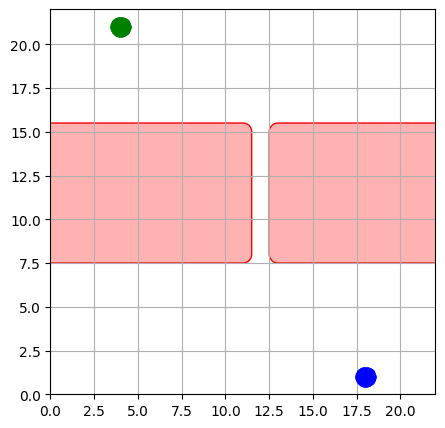

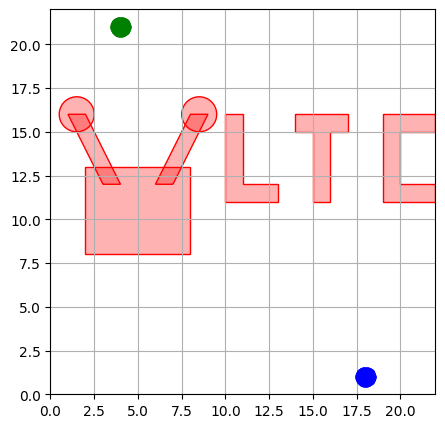

In [63]:
for benchmark in benchList:
    fig = plt.figure(figsize=(5,5))
    ax = fig.add_subplot(1,1,1)
    limits = benchmark.collisionChecker.getEnvironmentLimits()
    plotting.plot_points(Point(benchmark.startList[0]).buffer(.3), color="g", ax=ax)
    plotting.plot_points(Point(benchmark.goalList[0]).buffer(.3), color="b", ax=ax)

    ax.set_xlim(limits[0])
    ax.set_ylim(limits[1])
    benchmark.collisionChecker.drawObstacles(ax)

## Testing different Benchmarks

Planning Trap
Planning Bottleneck


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/networkx/drawing/nx_pylab.py:457: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  node_collection = ax.scatter(


Planning Fat bottleneck
Planning MyField


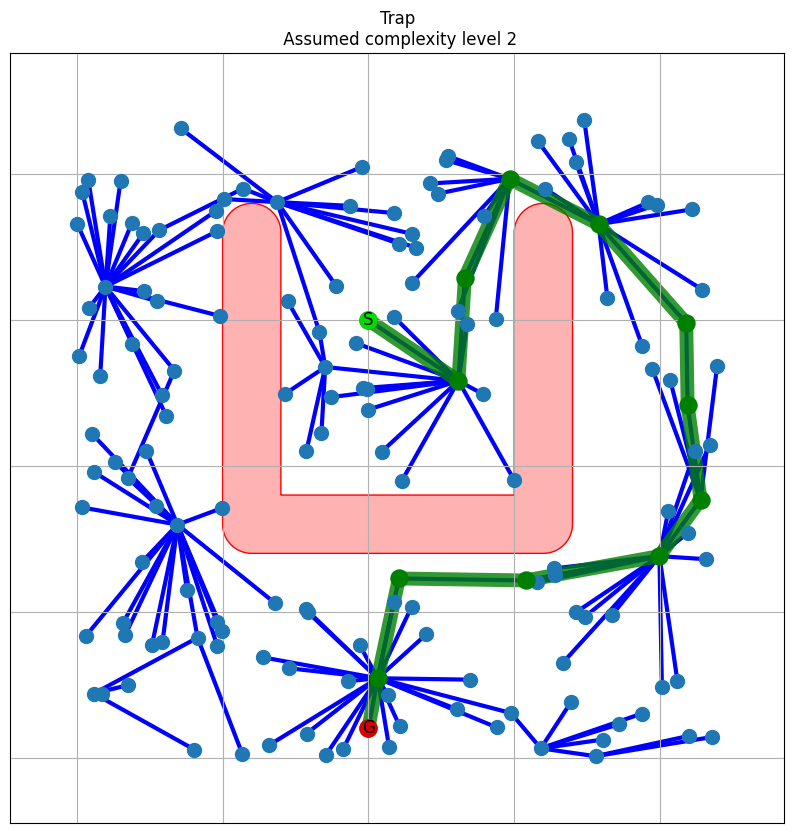

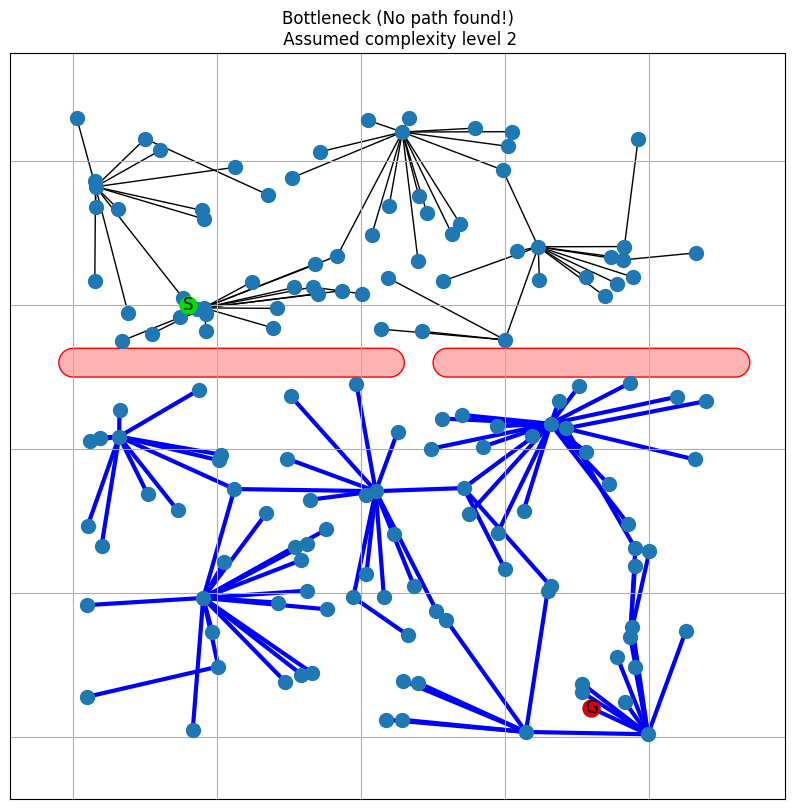

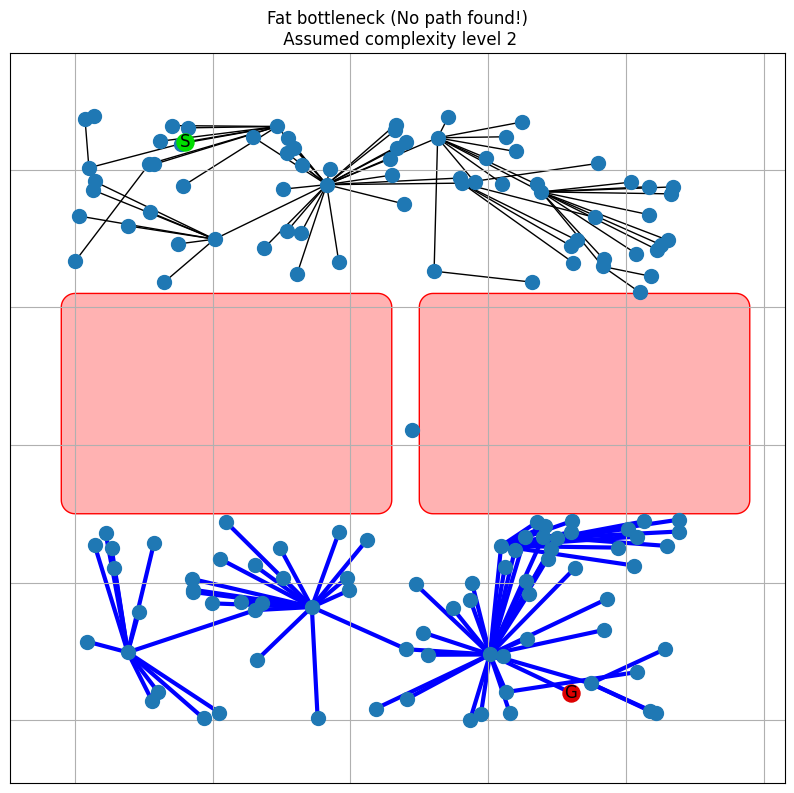

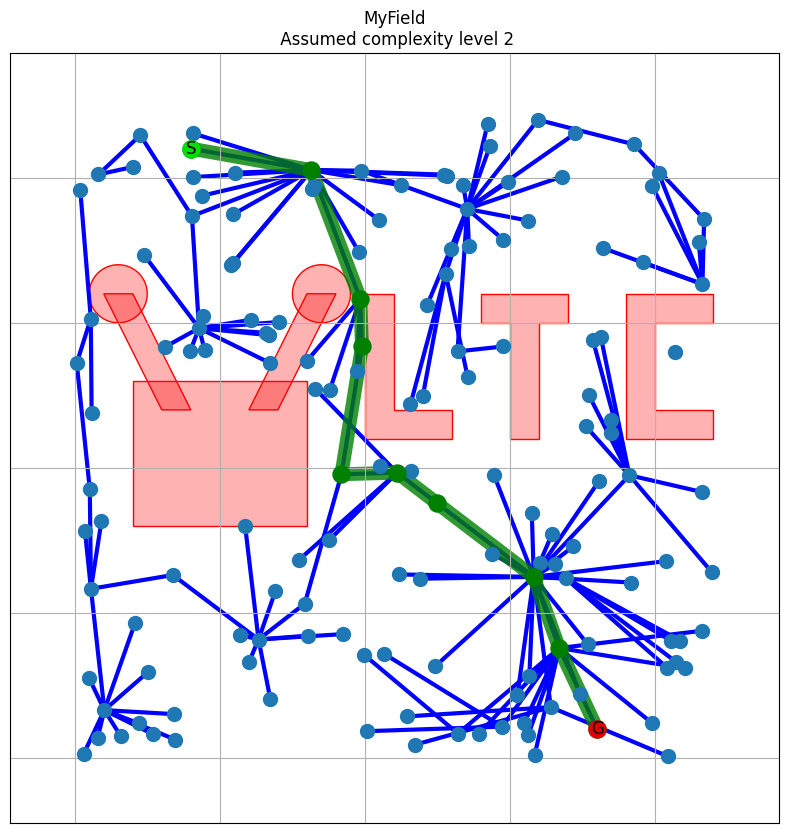

In [64]:
from IPBasicPRM import BasicPRM
from IPVISBasicPRM import basicPRMVisualize # explanation see IP-5-1-PRM-Basics-class.ipynb
from IPEnvironment import CollisionChecker
import matplotlib.pylab as plt

basicConfig = dict()
basicConfig["radius"] = 5
basicConfig["numNodes"] = 150

for bench in benchList:
    try:
        fig_local = plt.figure(figsize=(10,10))
        ax = fig_local.add_subplot(1,1,1)
        basicPRM = BasicPRM(bench.collisionChecker)
        print("Planning", bench.name)
        solution = basicPRM.planPath(bench.startList, bench.goalList, basicConfig)
        title = bench.name
        if solution == []:
            title += " (No path found!)"
        title += "\n Assumed complexity level " + str(bench.level)
        ax.set_title(title)
        basicPRMVisualize(basicPRM,solution,ax=ax)
    except Exception as e:
        print("ERROR: ",bench.name, e)

# Collecting Data

## Using profiling based on Python libraries (cProfile/pstats)

Following an example how to profile the algorithm using https://docs.python.org/3/library/profile.html

Fri May 23 13:10:44 2025    basicprmstats

         1410875 function calls (1396335 primitive calls) in 0.550 seconds

   Ordered by: cumulative time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
      306    0.016    0.000    0.328    0.001 IPEnvironment.py:43(lineInCollision)
    12412    0.014    0.000    0.266    0.000 IPEnvironment.py:32(pointInCollision)
      302    0.009    0.000    0.205    0.001 IPBasicPRM.py:38(_nearestNeighbours)
    45751    0.012    0.000    0.196    0.000 distance.py:511(euclidean)
    45751    0.031    0.000    0.184    0.000 distance.py:440(minkowski)
    24824    0.103    0.000    0.183    0.000 decorators.py:73(wrapped)
    12412    0.016    0.000    0.167    0.000 point.py:54(__new__)
    12412    0.005    0.000    0.128    0.000 decorators.py:171(wrapper)
    45751    0.027    0.000    0.115    0.000 _misc.py:17(norm)
    45751    0.026    0.000    0.074    0.000 _function_base_impl.py:589(asarray_chkfinite)
    12412    

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/networkx/drawing/nx_pylab.py:457: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  node_collection = ax.scatter(


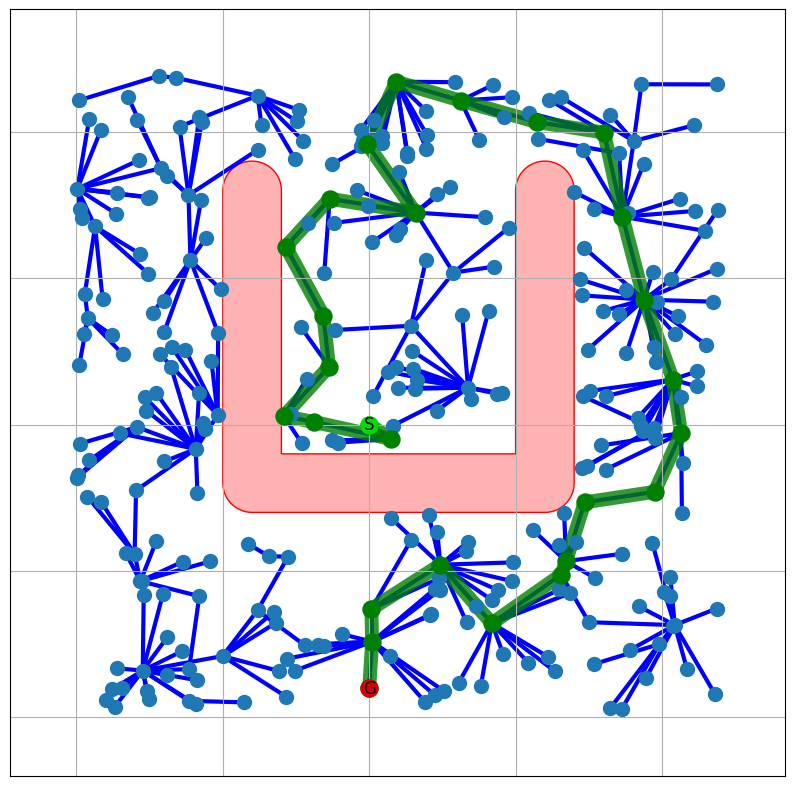

In [65]:
from IPBasicPRM import BasicPRM
from IPVISBasicPRM import basicPRMVisualize
from IPEnvironment import CollisionChecker
import matplotlib.pylab as plt

# Profile module and utilities
import cProfile
import pstats
from pstats import SortKey

# Definition of a testing environment
trapField = dict()
trapField["obs1"] = LineString([(6, 18), (6, 8), (16, 8), (16,18)]).buffer(1.0)

environment = CollisionChecker(trapField)

basicPRM = BasicPRM(environment)
basicConfig = dict()
basicConfig["radius"] = 3
basicConfig["numNodes"] = 300

start = [[10,10]]
goal  = [[10,1]]

cProfile.run('solution = basicPRM.planPath(start, goal, basicConfig)','basicprmstats') # will save astartstats to current directory


fig_local = plt.figure(figsize=(10,10))
ax = fig_local.add_subplot(1,1,1)
basicPRMVisualize(basicPRM,solution,ax=ax)


p = pstats.Stats('basicprmstats')
p.strip_dirs().sort_stats(SortKey.CUMULATIVE).print_stats()
p.sort_stats(SortKey.CUMULATIVE).print_stats(15)
p.sort_stats(SortKey.CALLS).print_stats(15)
p.sort_stats(SortKey.TIME).print_stats(15)



## Profiling using decorators

Decorators allow to "redirect" / "wrap" function calls in python, e.g.:

In [66]:
def just_some_function():
    print("Super Duper!")

In [67]:
just_some_function()

Super Duper!


In [68]:
def my_decorator(some_function):
    print("Info - I was called")
    intern = 0
    print(intern)
    
    def wrapper():
        nonlocal intern
        intern += 1
        print("Something is happening before some_function() is called.", intern)

        some_function()

        print("Something is happening after some_function() is called.", intern)

    return wrapper

In [69]:
just_some_function = my_decorator(just_some_function)
just_some_function()

Info - I was called
0
Something is happening before some_function() is called. 1
Super Duper!
Something is happening after some_function() is called. 1


In [70]:
for i in range(4):
    just_some_function()

Something is happening before some_function() is called. 2
Super Duper!
Something is happening after some_function() is called. 2
Something is happening before some_function() is called. 3
Super Duper!
Something is happening after some_function() is called. 3
Something is happening before some_function() is called. 4
Super Duper!
Something is happening after some_function() is called. 4
Something is happening before some_function() is called. 5
Super Duper!
Something is happening after some_function() is called. 5


### Syntactic sugar

In [71]:
@my_decorator
def just_some_function():
    print("Supder Duper!")

Info - I was called
0


In [72]:
for i in range(4):
    just_some_function()


Something is happening before some_function() is called. 1
Supder Duper!
Something is happening after some_function() is called. 1
Something is happening before some_function() is called. 2
Supder Duper!
Something is happening after some_function() is called. 2
Something is happening before some_function() is called. 3
Supder Duper!
Something is happening after some_function() is called. 3
Something is happening before some_function() is called. 4
Supder Duper!
Something is happening after some_function() is called. 4


**Please take note:** The print statement "Info - I was called" is called when defining the function with the decorator. In the notebook, if you execute the cell. In a typical python module when you import/load the module.

The IKPerfMonitor-Module defines a decorator class that can be used to collect data. Please check the examples in the search algorithms (e.g. IKRRT, IKPRMDistanceBased, IKVisibilityRoadmap, etc.):

```python
import pandas
import time

class IPPerfMonitor(object):
    "Decorator that keeps track of the number of times a function is called."

    __instances = {}

    def __init__(self, f):

        self.__f = f
        self.data = []
        IPPerfMonitor.__instances[f] = self

    def __call__(self, *args, **kwargs):
        
        starttime = time.time()
        ret = self.__f(*args, **kwargs)
        endtime = time.time()
        element = {'args': args, 'kwargs': kwargs, "retVal": ret, "time": endtime-starttime}
        self.data.append(element)
        
        return ret

    def _showargs(self, *fargs, **kw):
        print("T: enter {} with args={}, kw={}".format(self.__f.__name__, str(fargs), str(kw)))


    def __get__(self, instance, owner):
        from functools import partial
        return partial(self.__call__, instance)

    @staticmethod
    def dataFrame():
        "Return a dict of {function: # of calls} for all registered functions."
        result = []
        for f in IPPerfMonitor.__instances:
            
            for dataElement in IPPerfMonitor.__instances[f].data:
                context = dict({"name": f.__name__})
                context.update(dataElement)
                result.append(context)
        return pandas.DataFrame.from_dict(result)

    @staticmethod
    def clearData():
       "Clear data"
       for f in IPPerfMonitor.__instances:
            del IPPerfMonitor.__instances[f].data[:]
```

### Profiling planning algorithms

Some of the functions of the provided planning algorithm are equiped with decorators, e.g. (excerpt from IBasicPRM.py):


```python
class BasicPRM(IPPRMBase.PRMBase):

    def __init__(self, _collChecker):
        super(BasicPRM, self).__init__(_collChecker)
        self.graph = nx.Graph()

    
    @IPPerfMonitor
    def _inSameConnectedComponent(self, node1, node2):
        """ Check whether to nodes are part of the same connected component using
            functionality from NetworkX
        """
        for connectedComponent in nx.connected_components(self.graph):
            if (node1 in connectedComponent) & (node2 in connectedComponent):
                return True

        return False

    
    @IPPerfMonitor
    def _nearestNeighbours(self, pos, radius):
        """ Brute Force method to find all nodes of a 
        graph near the given position **pos** with in the distance of
        **radius** """

        result = list()
        for node in self.graph.nodes(data=True):
            if euclidean(node[1]['pos'],pos) <= radius:
                result.append(node)

        return result
```
....

This allows to execute something like:

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/networkx/drawing/nx_pylab.py:457: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  node_collection = ax.scatter(


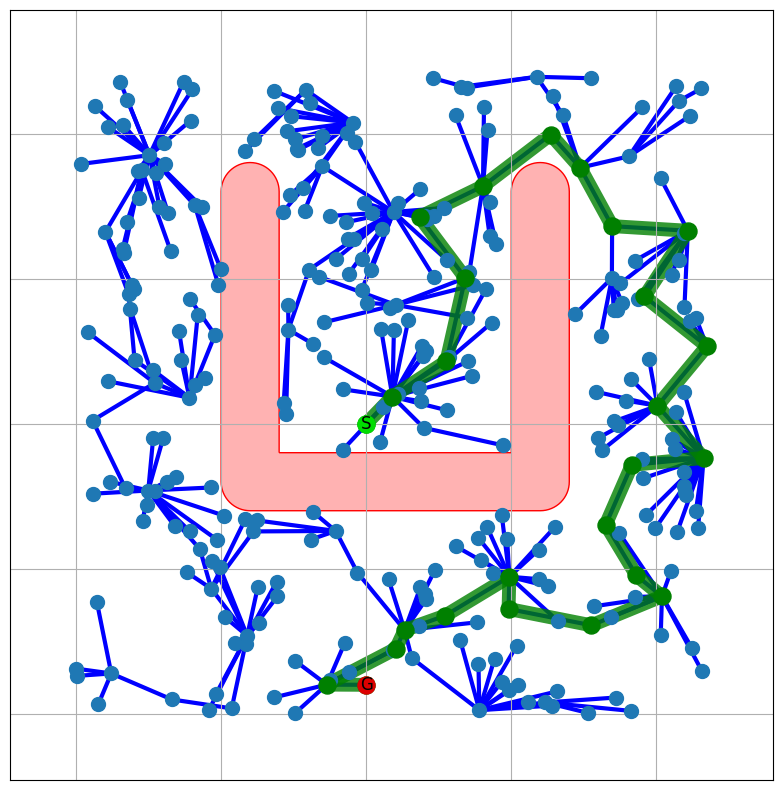

In [73]:
from IPBasicPRM import BasicPRM
from IPVISBasicPRM import basicPRMVisualize
from IPEnvironment import CollisionChecker
from IPPerfMonitor import IPPerfMonitor
import matplotlib.pylab as plt

# Definition of a testing environment
trapField = dict()
trapField["obs1"] = LineString([(6, 18), (6, 8), (16, 8), (16,18)]).buffer(1.0)

environment = CollisionChecker(trapField)

basicPRM = BasicPRM(environment)
basicConfig = dict()
basicConfig["radius"] = 3
basicConfig["numNodes"] = 300

start = [[10,10]]
goal  = [[10,1]]

##### if multiple calls are done IPPerfMonitor must be resetted (counts globally)
IPPerfMonitor.clearData()

solution = basicPRM.planPath(start, goal, basicConfig)

fig_local = plt.figure(figsize=(10,10))
ax = fig_local.add_subplot(1,1,1)
basicPRMVisualize(basicPRM,solution,ax=ax)


In [74]:
df = IPPerfMonitor.dataFrame()

In [75]:
df

,name,args,kwargs,retVal,time
0,pointInCollision,(<IPEnvironment.CollisionChecker object at 0x1...,{},False,0.000318
1,pointInCollision,(<IPEnvironment.CollisionChecker object at 0x1...,{},False,0.000090
2,pointInCollision,(<IPEnvironment.CollisionChecker object at 0x1...,{},True,0.000089
3,pointInCollision,(<IPEnvironment.CollisionChecker object at 0x1...,{},False,0.000033
4,pointInCollision,(<IPEnvironment.CollisionChecker object at 0x1...,{},False,0.000016
...,...,...,...,...,...
13883,_nearestNeighbours,"(<IPBasicPRM.BasicPRM object at 0x11c422750>, ...",{},"[(64, {'pos': [4.787665226602465, 13.062324989...",0.000769
13884,_nearestNeighbours,"(<IPBasicPRM.BasicPRM object at 0x11c422750>, ...",{},"[(14, {'pos': [10.90412454306408, 10.932361371...",0.000816
13885,_nearestNeighbours,"(<IPBasicPRM.BasicPRM object at 0x11c422750>, ...",{},"[(5, {'pos': [8.642516553187674, 1.00624068590...",0.000836
13886,_learnRoadmapNearestNeighbour,"(<IPBasicPRM.BasicPRM object at 0x11c422750>, ...",{},None,0.249741


In [76]:
df.groupby(["name"]).count()

,args,kwargs,retVal,time
name,,,,
_getRandomFreePosition,300,300,300,300
_inSameConnectedComponent,599,599,599,599
_learnRoadmapNearestNeighbour,1,1,0,1
_nearestNeighbours,302,302,302,302
lineInCollision,301,301,301,301
planPath,1,1,1,1
pointInCollision,12384,12384,12384,12384


In [77]:
df[(df.name=='lineInCollision') & (df.retVal==True)].count()

name      0
args      0
kwargs    0
retVal    0
time      0
dtype: int64

# Setting up a TestSuite

It makes probably sense to collect all benchmarks, in principle the list, in a dedicated module. Therefore the proposal would be to use such as (please check IPTestSuite.py):

``` python
from IPBenchmark import Benchmark 
from IPEnvironment import CollisionChecker
from shapely.geometry import Point, Polygon, LineString
import shapely.affinity
import math
import numpy as np


benchList = list()

# -----------------------------------------
trapField = dict()
trapField["obs1"] =   LineString([(6, 18), (6, 8), (16, 8), (16,18)]).buffer(1.0)
description = "Following the direct connection from goal to start would lead the algorithm into a trap."
benchList.append(Benchmark("Trap", CollisionChecker(trapField), [[10,15]], [[10,1]], description, 2))

# -----------------------------------------
bottleNeckField = dict()
bottleNeckField["obs1"] = LineString([(0, 13), (11, 13)]).buffer(.5)
bottleNeckField["obs2"] = LineString([(13, 13), (23,13)]).buffer(.5)
description = "Planer has to find a narrow passage."
benchList.append(Benchmark("Bottleneck", CollisionChecker(bottleNeckField), [[4,15]], [[18,1]], description, 2))

# -----------------------------------------
fatBottleNeckField = dict()
fatBottleNeckField["obs1"] = Polygon([(0, 8), (11, 8),(11, 15), (0, 15)]).buffer(.5)
fatBottleNeckField["obs2"] = Polygon([(13, 8), (24, 8),(24, 15), (13, 15)]).buffer(.5)
description = "Planer has to find a narrow passage with a significant extend."
benchList.append(Benchmark("Fat bottleneck", CollisionChecker(fatBottleNeckField), [[4,21]], [[18,1]], description, 2))

# -----------------------------------------
trapField = dict()
for i in range(10, 1300, 10) :
    radius = 1.0 * (i / 500.0)
    width = 1.0 * (i / 5000.0)
    trapField["obsA"+str(i/10)] = Point([(10 - np.cos(np.deg2rad(i))*radius, 10 - np.sin(np.deg2rad(i))*radius)]).buffer(width)
    trapField["obsB"+str(i/10)] = Point([(15 + np.sin(np.deg2rad(i))*radius, 15 + np.cos(np.deg2rad(i))*radius)]).buffer(width)
trapField["obsC"] = LineString([(5, 0.5), (5, 10), (15, 20), (20,20)]).buffer(0.5)

start = [[10,10]]
goal = [[15,15]]

description = "Two spirals block the way from start to goal."
benchList.append(Benchmark("Spirals", CollisionChecker(trapField), start, goal, description, 4))


```

This allows to use it like this:

In [58]:
import IPTestSuite as ts
import importlib # if changes are done during develpment this enforces reload of modules
importlib.reload(ts)

<module 'IPTestSuite' from '/Users/sboes/PycharmProjects/intro-path-planning/notebooks/IPTestSuite.py'>

In [59]:
basicConfig = dict()
basicConfig["radius"] = 5
basicConfig["numNodes"] = 400

Planning Trap


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/networkx/drawing/nx_pylab.py:457: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  node_collection = ax.scatter(


Planning Bottleneck
Planning Fat bottleneck
Planning MyField


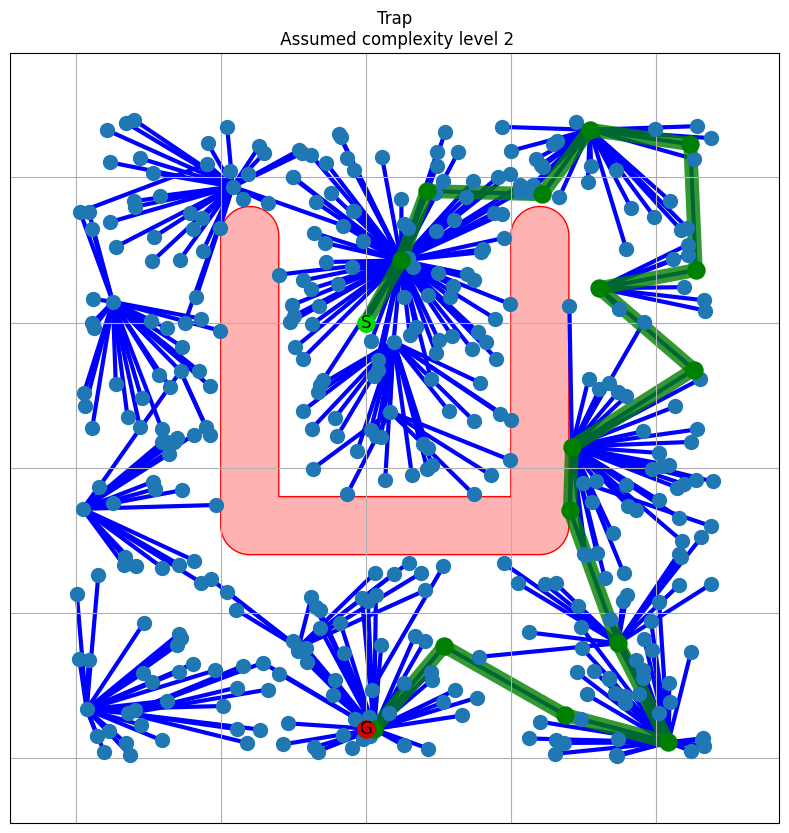

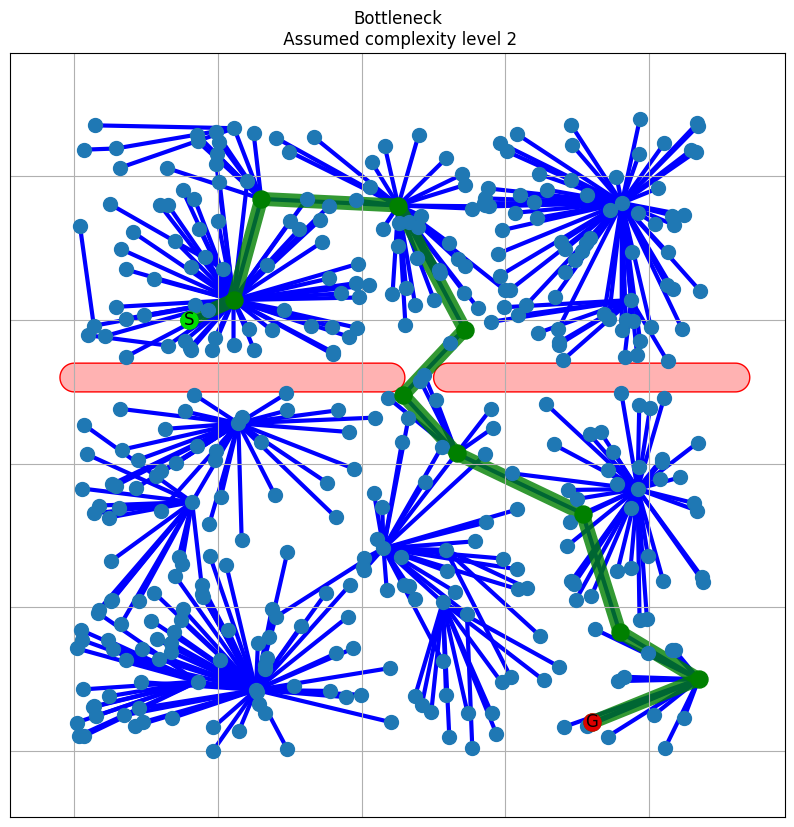

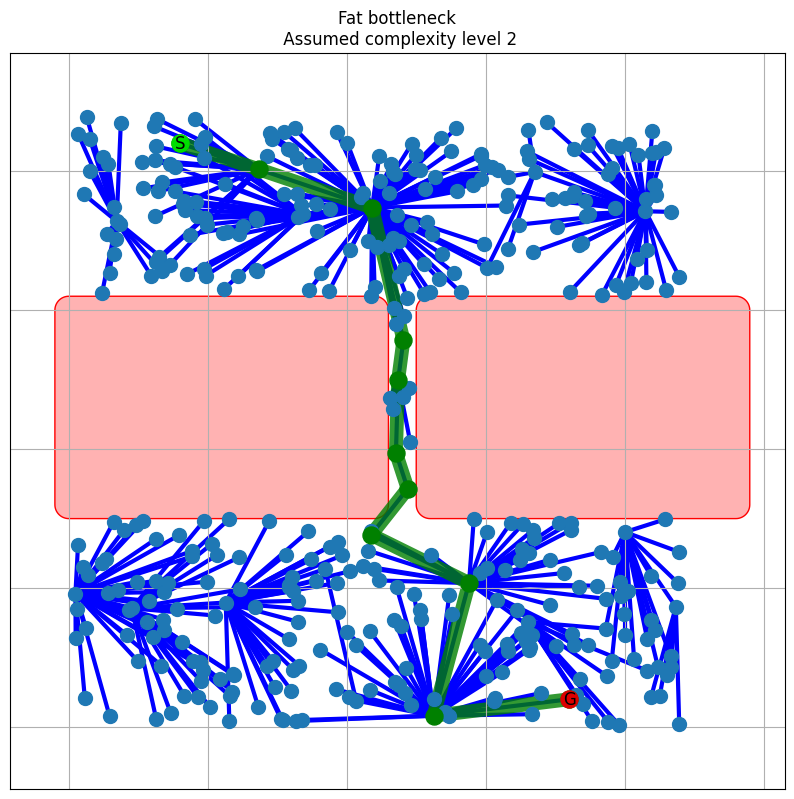

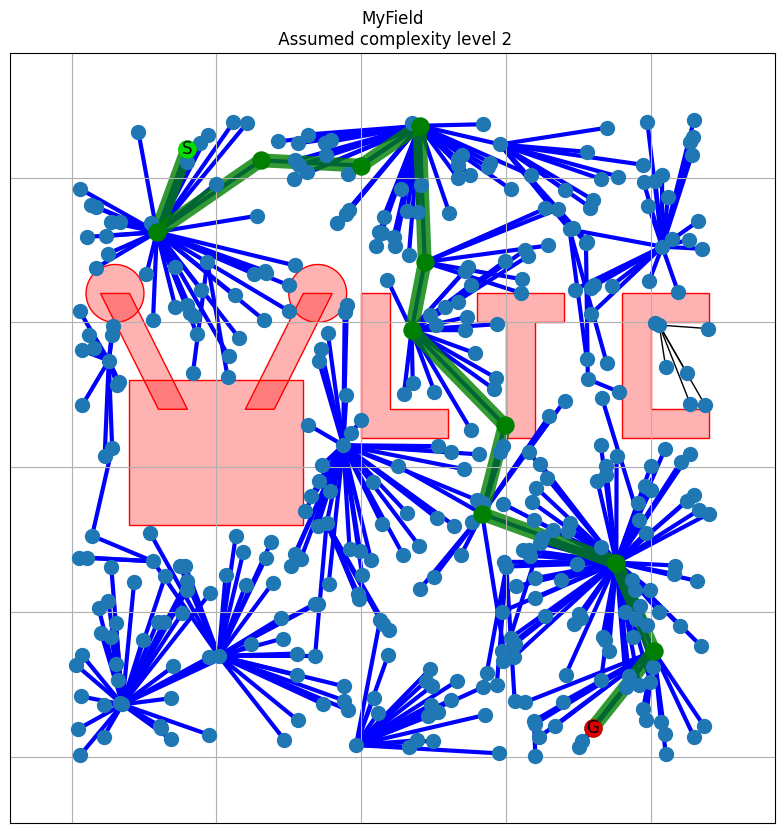

In [60]:
for benchmark in ts.benchList:
    try:
        fig_local = plt.figure(figsize=(10,10))
        ax = fig_local.add_subplot(1,1,1)
        basicPRM = BasicPRM(benchmark.collisionChecker)
        print("Planning", benchmark.name)
        solution = basicPRM.planPath(benchmark.startList, benchmark.goalList, basicConfig)
        title = benchmark.name
        if solution == []:
            title += " (No path found!)"
        title += "\n Assumed complexity level " + str(bench.level)
        ax.set_title(title)
        basicPRMVisualize(basicPRM,solution,ax=ax)
    except Exception as e:
        print("ERROR: ",benchmark.name, e)    